In [1]:
# load libraries
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(arrow)))
suppressWarnings(suppressPackageStartupMessages(library(patchwork)))
# import ggplot theme
source("../../utils/figure_themes.r")

In [2]:
# path to the anova data
anova_genotype_df_path <- file.path("..","..","data","6.analysis_results","anova_results_genotype.parquet")
anova_genotype_side_df_path <- file.path("..","..","data","6.analysis_results","anova_results_genotype_side.parquet")
anova_genotype_side_identity_df_path <- file.path("..","..","data","6.analysis_results","anova_results_genotype_side_identity.parquet")
data_path <- file.path("..","..","data","5.converted_data","normalized_feature_selected_output.parquet")

# read the data
data_df <- arrow::read_parquet(data_path)
head(data_df)

# read the anova data
anova_genotype_df <- arrow::read_parquet(anova_genotype_df_path)
anova_genotype_side_df <- arrow::read_parquet(anova_genotype_side_df_path)
anova_genotype_side_identity_df <- arrow::read_parquet(anova_genotype_side_identity_df_path)

Metadata_Image_FileName_OP,Metadata_ObjectNumber,Metadata_Object_ConvertImageToObjects_Number_Object_Number,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxArea,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMaximum_X,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMaximum_Y,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMinimum_X,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMinimum_Y,Metadata_Object_ConvertImageToObjects_Location_CenterMassIntensity_X_OP,Metadata_Object_ConvertImageToObjects_Location_CenterMassIntensity_Y_OP,⋯,Texture_SumEntropy_OP_3_02_256,Texture_SumEntropy_OP_3_03_256,Texture_SumVariance_OP_3_00_256,Texture_SumVariance_OP_3_01_256,Texture_SumVariance_OP_3_02_256,Texture_SumVariance_OP_3_03_256,Texture_Variance_OP_3_00_256,Texture_Variance_OP_3_01_256,Texture_Variance_OP_3_02_256,Texture_Variance_OP_3_03_256
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MAX_high_10_L.tiff,1,1,38250,269,182,44,12,131.5461,118.6411,⋯,0.8414748,0.8345736,1.14918564,1.1522001,1.07890507,1.14484796,1.04000878,1.02573996,1.04549223,1.02761705
MAX_high_10_R.tiff,1,1,34170,208,245,38,44,106.9621,162.3042,⋯,0.4524796,0.4361385,0.11217819,0.1319819,0.10860250,0.12569959,0.07571690,0.07120688,0.07647711,0.06792193
MAX_high_11_L.tiff,1,1,41736,250,267,62,45,131.3598,159.4445,⋯,0.4948130,0.4908441,-0.01613966,0.0010415,-0.02199706,-0.02099207,-0.03393425,-0.04263493,-0.03498345,-0.03876252
MAX_high_11_R.tiff,1,1,43616,212,272,24,40,101.0699,185.4864,⋯,0.8787288,0.8656168,1.12090459,1.1406044,1.07452904,1.11794134,1.03158516,1.01517198,1.03514983,1.01918842
MAX_high_12_L.tiff,2,2,25894,283,155,69,34,164.5791,105.2665,⋯,0.4767676,0.4826737,0.17788587,0.1479330,0.10331342,0.15645695,0.11176513,0.10784585,0.11761376,0.10885888
MAX_high_12_R.tiff,1,1,40920,229,265,43,45,119.3891,173.5103,⋯,0.1422418,0.1351928,-0.28744321,-0.2676854,-0.30011318,-0.29231741,-0.31932910,-0.32658057,-0.31978483,-0.32240245


## Genotype, side and identity level data

### ANOVA means

In [3]:

anova_genotype_side_identity_df$log10_anova_p_value <- -log10(anova_genotype_side_identity_df$anova_p_value)
# order the results by log10 anova p-value
anova_genotype_side_identity_df <- anova_genotype_side_identity_df %>% arrange(log10_anova_p_value)
# split the feature into 3 groups at "_"
anova_genotype_side_identity_df$feature_type <- sapply(strsplit(anova_genotype_side_identity_df$feature, "_"), function(x) x[1])
anova_genotype_side_identity_df$feature_name <- sapply(strsplit(anova_genotype_side_identity_df$feature, "_"), function(x) x[2])
head(anova_genotype_side_identity_df)


group1,group2,meandiff,p-adj,lower,upper,reject,feature,anova_p_value,log10_anova_p_value,feature_type,feature_name
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
high_both_L,high_both_R,0.0524,1,-1.2241,1.3288,FALSE,RadialDistribution_ZernikePhase_OP_7_3,0.9739533,0.01146188,RadialDistribution,ZernikePhase
high_both_L,unsel_both_R,-0.0281,1,-2.5811,2.5248,FALSE,RadialDistribution_ZernikePhase_OP_7_3,0.9739533,0.01146188,RadialDistribution,ZernikePhase
high_both_L,unsel_br_L,0.1863,1,-1.1144,1.4871,FALSE,RadialDistribution_ZernikePhase_OP_7_3,0.9739533,0.01146188,RadialDistribution,ZernikePhase
high_both_L,unsel_br_R,-0.0196,1,-1.3482,1.3090,FALSE,RadialDistribution_ZernikePhase_OP_7_3,0.9739533,0.01146188,RadialDistribution,ZernikePhase
high_both_L,unsel_op_L,-0.1864,1,-1.4872,1.1144,FALSE,RadialDistribution_ZernikePhase_OP_7_3,0.9739533,0.01146188,RadialDistribution,ZernikePhase
high_both_L,unsel_op_R,-0.0884,1,-1.4170,1.2401,FALSE,RadialDistribution_ZernikePhase_OP_7_3,0.9739533,0.01146188,RadialDistribution,ZernikePhase


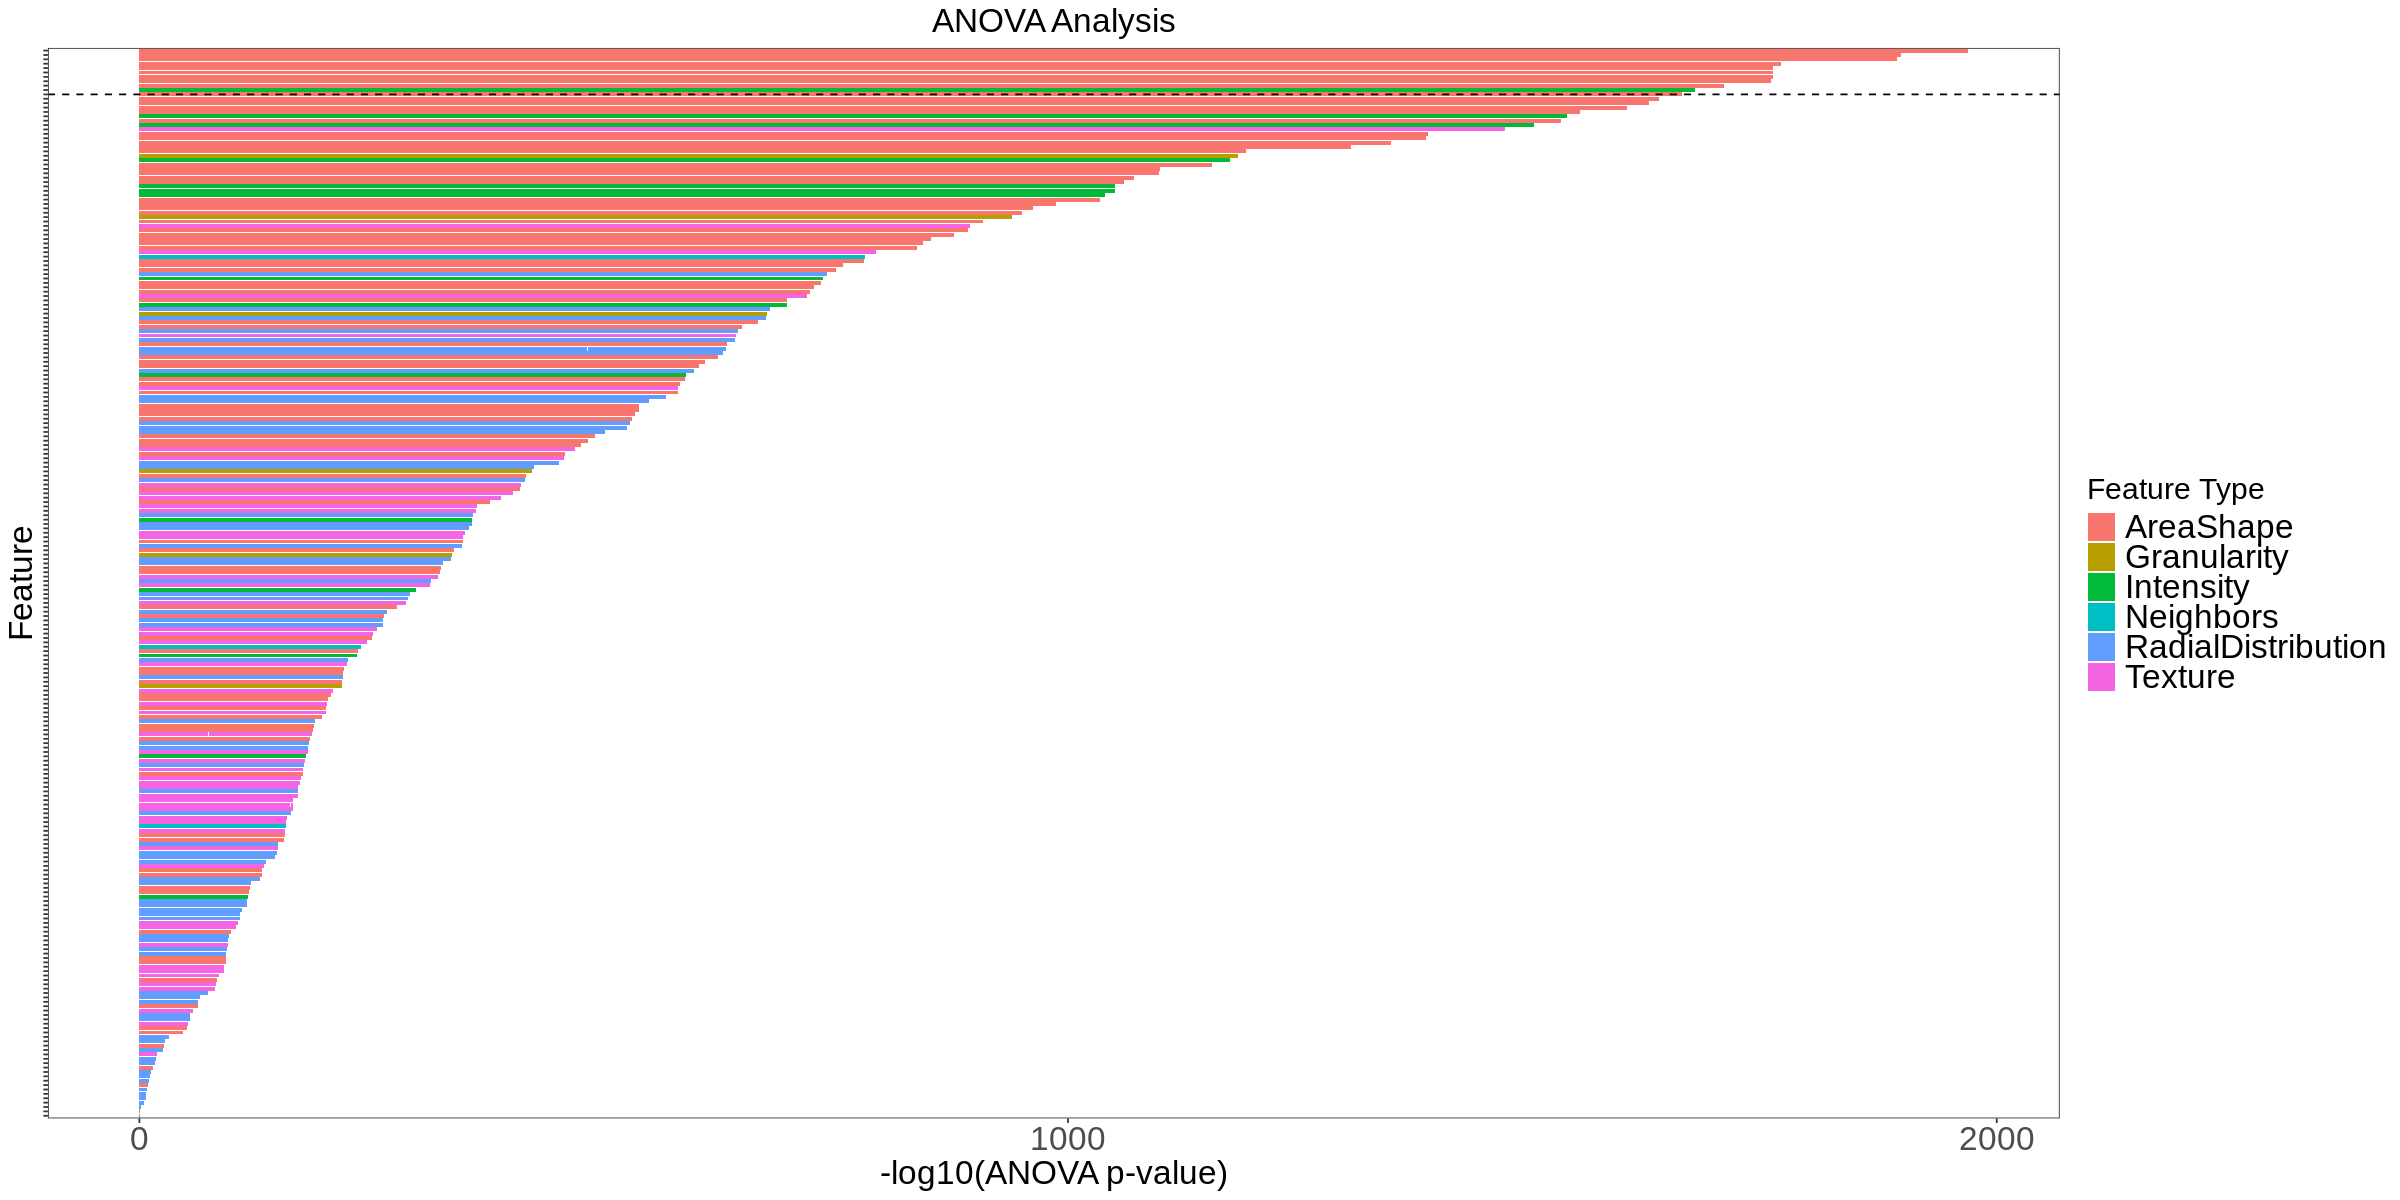

In [4]:
width <- 20
height <- 10
options(repr.plot.width = width, repr.plot.height = height)
anova_plot <- (
    # order the results by log10 anova p-value
    ggplot(anova_genotype_side_identity_df, aes(y = reorder(feature, log10_anova_p_value), x = log10_anova_p_value, fill = feature_type))
    + geom_bar(stat = "identity")
    # drop y axis labels
    + theme(axis.text.x = element_text(angle = 90, hjust = 1))
    + labs(title = "ANOVA Analysis", y = "Feature", x = "-log10(ANOVA p-value)", fill = "Feature Type")
   
    + figure_theme


    + theme(axis.text.y = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank())
    + theme(axis.text.y = element_blank())
    + geom_hline(yintercept = length(unique(anova_genotype_side_identity_df$feature))-10, linetype = "dashed", color = "black")
    # custom x ticks
    + scale_x_continuous(breaks = c(0, 1000, 2000), labels = c("0", "1000", "2000"))
     
)
anova_plot
# save the plot
ggsave(file = "anova_plot.png", plot = anova_plot, path = file.path("..", "figures"), width = width, height = height, dpi = 600)

## Test for equality of variance 

In [5]:
# load levene data in 
levene_df_path <- file.path("..","..","data","6.analysis_results","levene_test_results.csv")
levene_df <- read.csv(levene_df_path)
head(levene_df)

,X,feature,levene_statistic,levene_p_value,group
,<int>,<chr>,<dbl>,<dbl>,<chr>
1,429,RadialDistribution_ZernikePhase_OP_8_2,9.215577e-05,0.9923639,high_vs_wt
2,441,Texture_AngularSecondMoment_OP_3_03_256,6.200963e-04,0.9801938,high_vs_wt
3,149,RadialDistribution_ZernikeMagnitude_OP_6_4,6.497006e-04,0.9797298,high_vs_unsel
4,143,RadialDistribution_ZernikeMagnitude_OP_4_4,7.542741e-04,0.9781598,high_vs_unsel
5,560,AreaShape_Zernike_1_1,7.959461e-04,0.9775457,unsel_vs_wt
6,275,AreaShape_InertiaTensor_0_0,8.132388e-04,0.9773188,high_vs_wt


### Variances

In [6]:
width <- 4
height <- 4
options(repr.plot.width = width, repr.plot.height = height)
# make a new column for the group1 and group2
anova_genotype_side_identity_df$comparison <- paste(anova_genotype_side_identity_df$group1, anova_genotype_side_identity_df$group2, sep = " - ")

# order the results by anova p-value
anova_genotype_side_identity_df <- anova_genotype_side_identity_df %>% arrange(anova_p_value)
features <- unique(anova_genotype_side_identity_df$feature)[1:10]
features
top_10_anova_genotype_side_identity_df <- anova_genotype_side_identity_df %>% filter(feature %in% features)
top_10_anova_genotype_side_identity_df$log10_tukey_p_value <- -log10(top_10_anova_genotype_side_identity_df$`p-adj`)
# make the genotype a factor
# replace the genotype values
data_df$Metadata_genotype <- gsub("wt", "Wild Type", data_df$Metadata_genotype)
data_df$Metadata_genotype <- gsub("unsel", "Mid-Severity", data_df$Metadata_genotype)
data_df$Metadata_genotype <- gsub("high", "High-Severity", data_df$Metadata_genotype)
data_df$Metadata_genotype <- factor(
    data_df$Metadata_genotype, 
    levels = c("Wild Type", "Mid-Severity", "High-Severity")
)
head(data_df)

[1] "AreaShape_ConvexArea"           "AreaShape_MinFeretDiameter"    
 [3] "AreaShape_MinorAxisLength"      "AreaShape_Zernike_0_0"         
 [5] "AreaShape_Area"                 "AreaShape_CentralMoment_0_0"   
 [7] "AreaShape_SpatialMoment_0_0"    "AreaShape_EquivalentDiameter"  
 [9] "AreaShape_MedianRadius"         "Intensity_MeanIntensityEdge_OP"

Metadata_Image_FileName_OP,Metadata_ObjectNumber,Metadata_Object_ConvertImageToObjects_Number_Object_Number,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxArea,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMaximum_X,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMaximum_Y,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMinimum_X,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMinimum_Y,Metadata_Object_ConvertImageToObjects_Location_CenterMassIntensity_X_OP,Metadata_Object_ConvertImageToObjects_Location_CenterMassIntensity_Y_OP,⋯,Texture_SumEntropy_OP_3_02_256,Texture_SumEntropy_OP_3_03_256,Texture_SumVariance_OP_3_00_256,Texture_SumVariance_OP_3_01_256,Texture_SumVariance_OP_3_02_256,Texture_SumVariance_OP_3_03_256,Texture_Variance_OP_3_00_256,Texture_Variance_OP_3_01_256,Texture_Variance_OP_3_02_256,Texture_Variance_OP_3_03_256
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MAX_high_10_L.tiff,1,1,38250,269,182,44,12,131.5461,118.6411,⋯,0.8414748,0.8345736,1.14918564,1.1522001,1.07890507,1.14484796,1.04000878,1.02573996,1.04549223,1.02761705
MAX_high_10_R.tiff,1,1,34170,208,245,38,44,106.9621,162.3042,⋯,0.4524796,0.4361385,0.11217819,0.1319819,0.10860250,0.12569959,0.07571690,0.07120688,0.07647711,0.06792193
MAX_high_11_L.tiff,1,1,41736,250,267,62,45,131.3598,159.4445,⋯,0.4948130,0.4908441,-0.01613966,0.0010415,-0.02199706,-0.02099207,-0.03393425,-0.04263493,-0.03498345,-0.03876252
MAX_high_11_R.tiff,1,1,43616,212,272,24,40,101.0699,185.4864,⋯,0.8787288,0.8656168,1.12090459,1.1406044,1.07452904,1.11794134,1.03158516,1.01517198,1.03514983,1.01918842
MAX_high_12_L.tiff,2,2,25894,283,155,69,34,164.5791,105.2665,⋯,0.4767676,0.4826737,0.17788587,0.1479330,0.10331342,0.15645695,0.11176513,0.10784585,0.11761376,0.10885888
MAX_high_12_R.tiff,1,1,40920,229,265,43,45,119.3891,173.5103,⋯,0.1422418,0.1351928,-0.28744321,-0.2676854,-0.30011318,-0.29231741,-0.31932910,-0.32658057,-0.31978483,-0.32240245


In [7]:
width <- 8
height <- 8

list_of_genotype_side_identity_anova_plots_split_by_genotype <- list()
list_of_genotype_side_identity_anova_plots_split_by_genotype_side <- list()

for (i in 1:length(features)){
    print(features[i])
    # get the top feature
    tmp <- data_df %>% select(c("Metadata_genotype", "Metadata_identity", "Metadata_side", features[i]))
    # aggregate the data to get the mean and standard deviation of the top feature
    tmp <- tmp %>% group_by(Metadata_genotype) %>% summarise(mean = mean(!!as.name(features[i])), sd = sd(!!as.name(features[i])))
    # calculate the variance where variance = sd^2
    tmp$variance <- tmp$sd^2
    title <- gsub("_", " ", features[i])
    # plot the variability of the top feature
    var_plot <- (
        ggplot(tmp, aes(x = Metadata_genotype, y = variance, fill = Metadata_genotype)) 
        + geom_bar(stat = "identity")
        + theme(axis.text.x = element_text(angle = 90, hjust = 1))
        + labs(title = title, x = "Genotype", y = "Variance", fill = "Genotype")
        + theme_bw()
        + figure_theme
    )
    # save var plot
    ggsave(file = paste0(features[i], "_variance_plot_genotype.png"), plot = var_plot, path = file.path("..", "figures"), width = width, height = height, dpi = 600)

    list_of_genotype_side_identity_anova_plots_split_by_genotype[[i]] <- var_plot
    # get the top feature
    tmp <- data_df %>% select(c("Metadata_genotype", "Metadata_identity", "Metadata_side", features[i]))
    # aggregate the data to get the mean and standard deviation of the top feature
    tmp <- tmp %>% group_by(Metadata_genotype, Metadata_side) %>% summarise(mean = mean(!!as.name(features[i])), sd = sd(!!as.name(features[i])))
    # calculate the variance where variance = sd^2
    tmp$variance <- tmp$sd^2
    # plot the variability of the top feature
    var_plot <- (
        ggplot(tmp, aes(x = Metadata_genotype, y = variance, fill = Metadata_side)) 
        + geom_bar(stat = "identity", position = "dodge")
        + theme(axis.text.x = element_text(angle = 90, hjust = 1))
        + labs(title = title, x = "Genotype", y = "Variance", fill = "Side")

        + theme_bw()
        + figure_theme
    )
    # save var plot
    ggsave(file = paste0(features[i], "_variance_plot_genotype_side.png"), plot = var_plot, path = file.path("..", "figures"), width = width, height = height, dpi = 600)

    list_of_genotype_side_identity_anova_plots_split_by_genotype_side[[i]] <- var_plot
}

[1] "AreaShape_ConvexArea"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


[1] "AreaShape_MinFeretDiameter"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


[1] "AreaShape_MinorAxisLength"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


[1] "AreaShape_Zernike_0_0"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


[1] "AreaShape_Area"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


[1] "AreaShape_CentralMoment_0_0"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


[1] "AreaShape_SpatialMoment_0_0"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


[1] "AreaShape_EquivalentDiameter"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


[1] "AreaShape_MedianRadius"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


[1] "Intensity_MeanIntensityEdge_OP"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


## ANOVAs for each feature on variances of genotypes


In [8]:
# filter the anova results to only include the top 10 features
top_10_anova_genotype_df <- anova_genotype_df %>% filter(feature %in% features)
top_10_anova_genotype_df$`p-adj` <- abs(top_10_anova_genotype_df$`p-adj`)

In [9]:
# list_of_genotype_side_identity_anova_plots_split_by_genotype[[1]]
# # add significance to the plot
# library(ggsignif)


## Distance Analysis

In [10]:
# load in the unormalized data
df_path <- file.path("..","..","data","5.converted_data","output.parquet")
df <- arrow::read_parquet(df_path)
# split the Metadata_Image_FileName into the genotype, and side
df$Metadata_genotype <- sapply(strsplit(df$Metadata_Image_FileName_OP, "_"), function(x) x[2])
df$Metadata_side <- sapply(strsplit(df$Metadata_Image_FileName_OP, "_"), function(x) x[4])
df$Metadata_side <- gsub(".tiff", "", df$Metadata_side)
df <- df %>% select(c("Metadata_genotype", "Metadata_identity", "Metadata_side", "Neighbors_FirstClosestDistance_Adjacent"))
# manually correct the high genotype to be 0 for the Neighbors_FirstClosestDistance_Adjacent feature
df$Neighbors_FirstClosestDistance_Adjacent[df$Metadata_genotype == "high"] <- 0

# units are in pixels so convert to microns
resolution = 1.6585 # pixels per micron
df$Neighbors_FirstClosestDistance_Adjacent <- df$Neighbors_FirstClosestDistance_Adjacent / resolution
df$Metadata_genotype <- gsub("wt", "Wild Type", df$Metadata_genotype)
df$Metadata_genotype <- gsub("unsel", "Mid-Severity", df$Metadata_genotype)
df$Metadata_genotype <- gsub("high", "High-Severity", df$Metadata_genotype)
df$Metadata_genotype <- factor(
    df$Metadata_genotype, 
    levels = c("Wild Type", "Mid-Severity", "High-Severity")
)

head(df)

Metadata_genotype,Metadata_identity,Metadata_side,Neighbors_FirstClosestDistance_Adjacent
<fct>,<chr>,<chr>,<dbl>
High-Severity,both,L,0
High-Severity,both,R,0
High-Severity,both,L,0
High-Severity,both,R,0
High-Severity,both,L,0
High-Severity,both,R,0


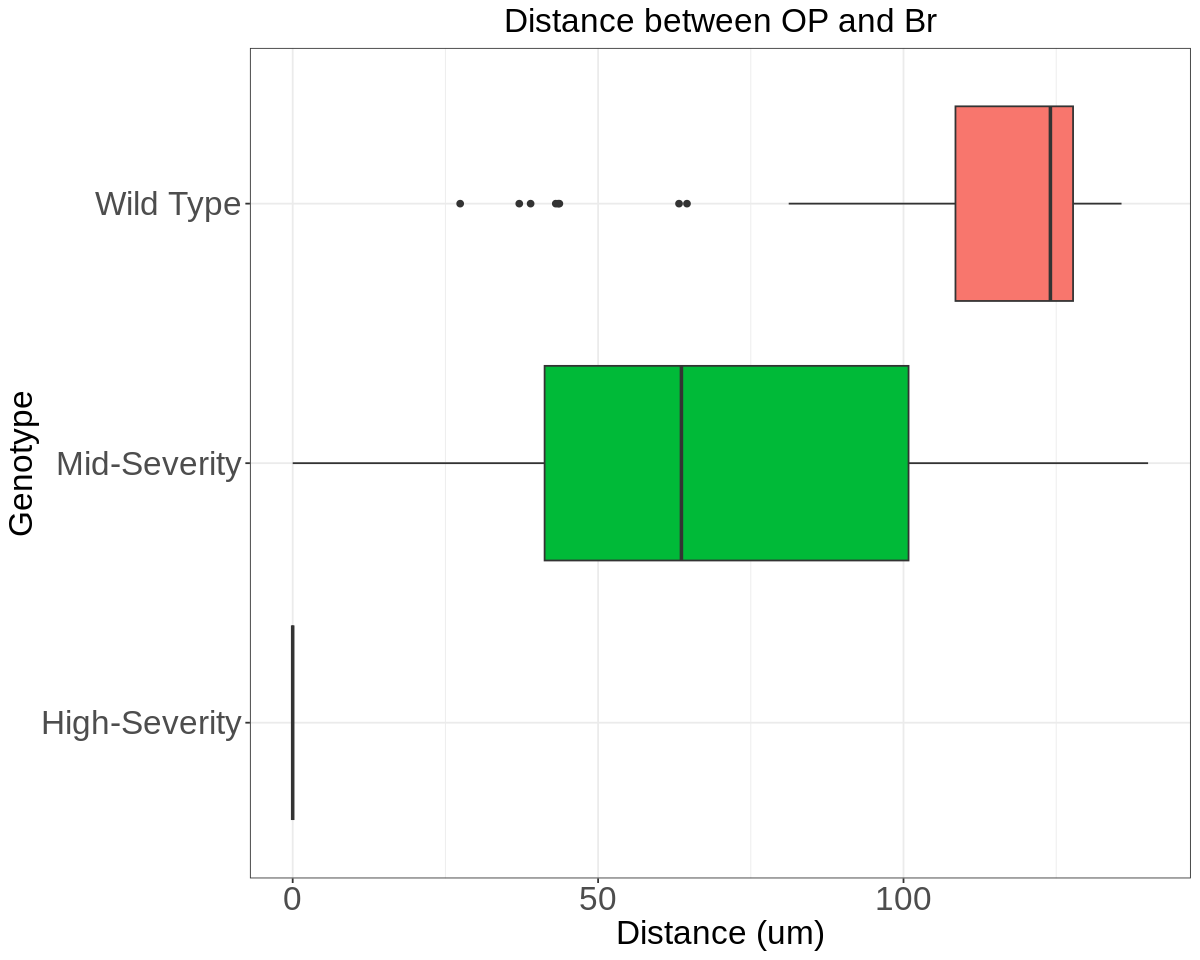

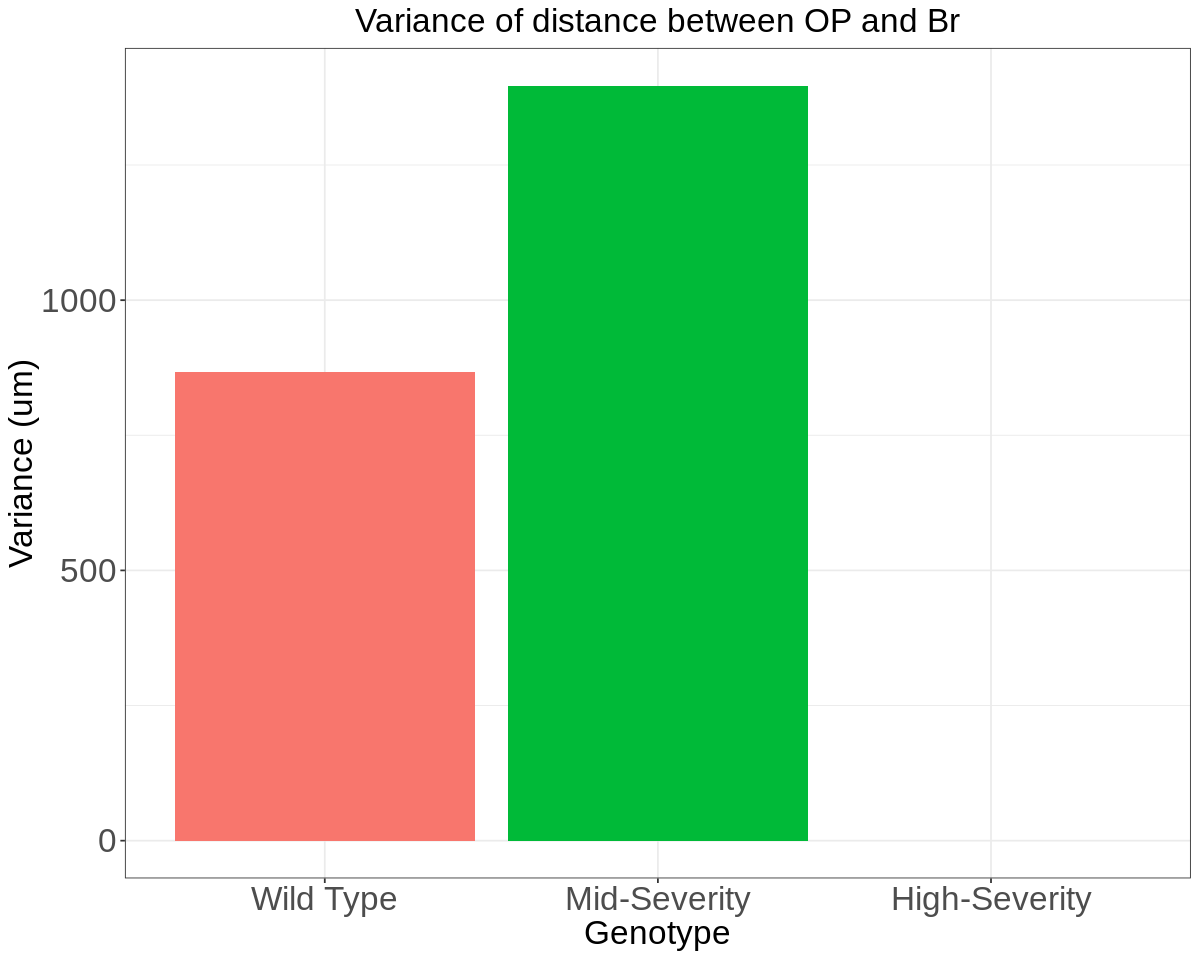

In [11]:
# plot 
width <- 10
height <- 8
options(repr.plot.width = width, repr.plot.height = height)
# reorder the genotype factor
distance_plot <- (
    ggplot(df, aes(
        # reorder the genotype factor
        y = reorder(Metadata_genotype, Neighbors_FirstClosestDistance_Adjacent),
        x = Neighbors_FirstClosestDistance_Adjacent, fill = Metadata_genotype)) 
    + geom_boxplot()
    + theme(axis.text.x = element_text(angle = 90, hjust = 1))
    + labs(title = "Distance between OP and Br", x = "Distance (um)", y = "Genotype", fill = "Genotype")
    + theme_bw()
    + figure_theme
    # drop legend 
    + theme(legend.position = "none")
)
distance_plot
# save the plot
ggsave(file = "distance_plot_genotype.png", plot = distance_plot, path = file.path("..", "figures"), width = width, height = height, dpi = 600)

# reorder the genotype factor
df$Metadata_genotype <- factor(df$Metadata_genotype, levels = c("Wild Type", "Mid-Severity", "High-Severity"))
# plot the variance of the Neighbors_FirstClosestDistance_Adjacent feature
tmp <- df %>% group_by(Metadata_genotype) %>% summarise(mean = mean(Neighbors_FirstClosestDistance_Adjacent), sd = sd(Neighbors_FirstClosestDistance_Adjacent))
tmp$variance <- tmp$sd^2
var_plot <- (
    ggplot(tmp, aes(x = Metadata_genotype, y = variance, fill = Metadata_genotype)) 
    + geom_bar(stat = "identity")
    + theme(axis.text.x = element_text(angle = 90, hjust = 1))
    + labs(title = "Variance of distance between OP and Br", x = "Genotype", y = "Variance (um)", fill = "Genotype")
    + theme_bw()
    + figure_theme
    + theme(legend.position = "none")
)
var_plot
# save the plot
ggsave(file = "distance_variance_plot_genotype.png", plot = var_plot, path = file.path("..", "figures"), width = width, height = height, dpi = 600)

## Final Figure

png 
  2

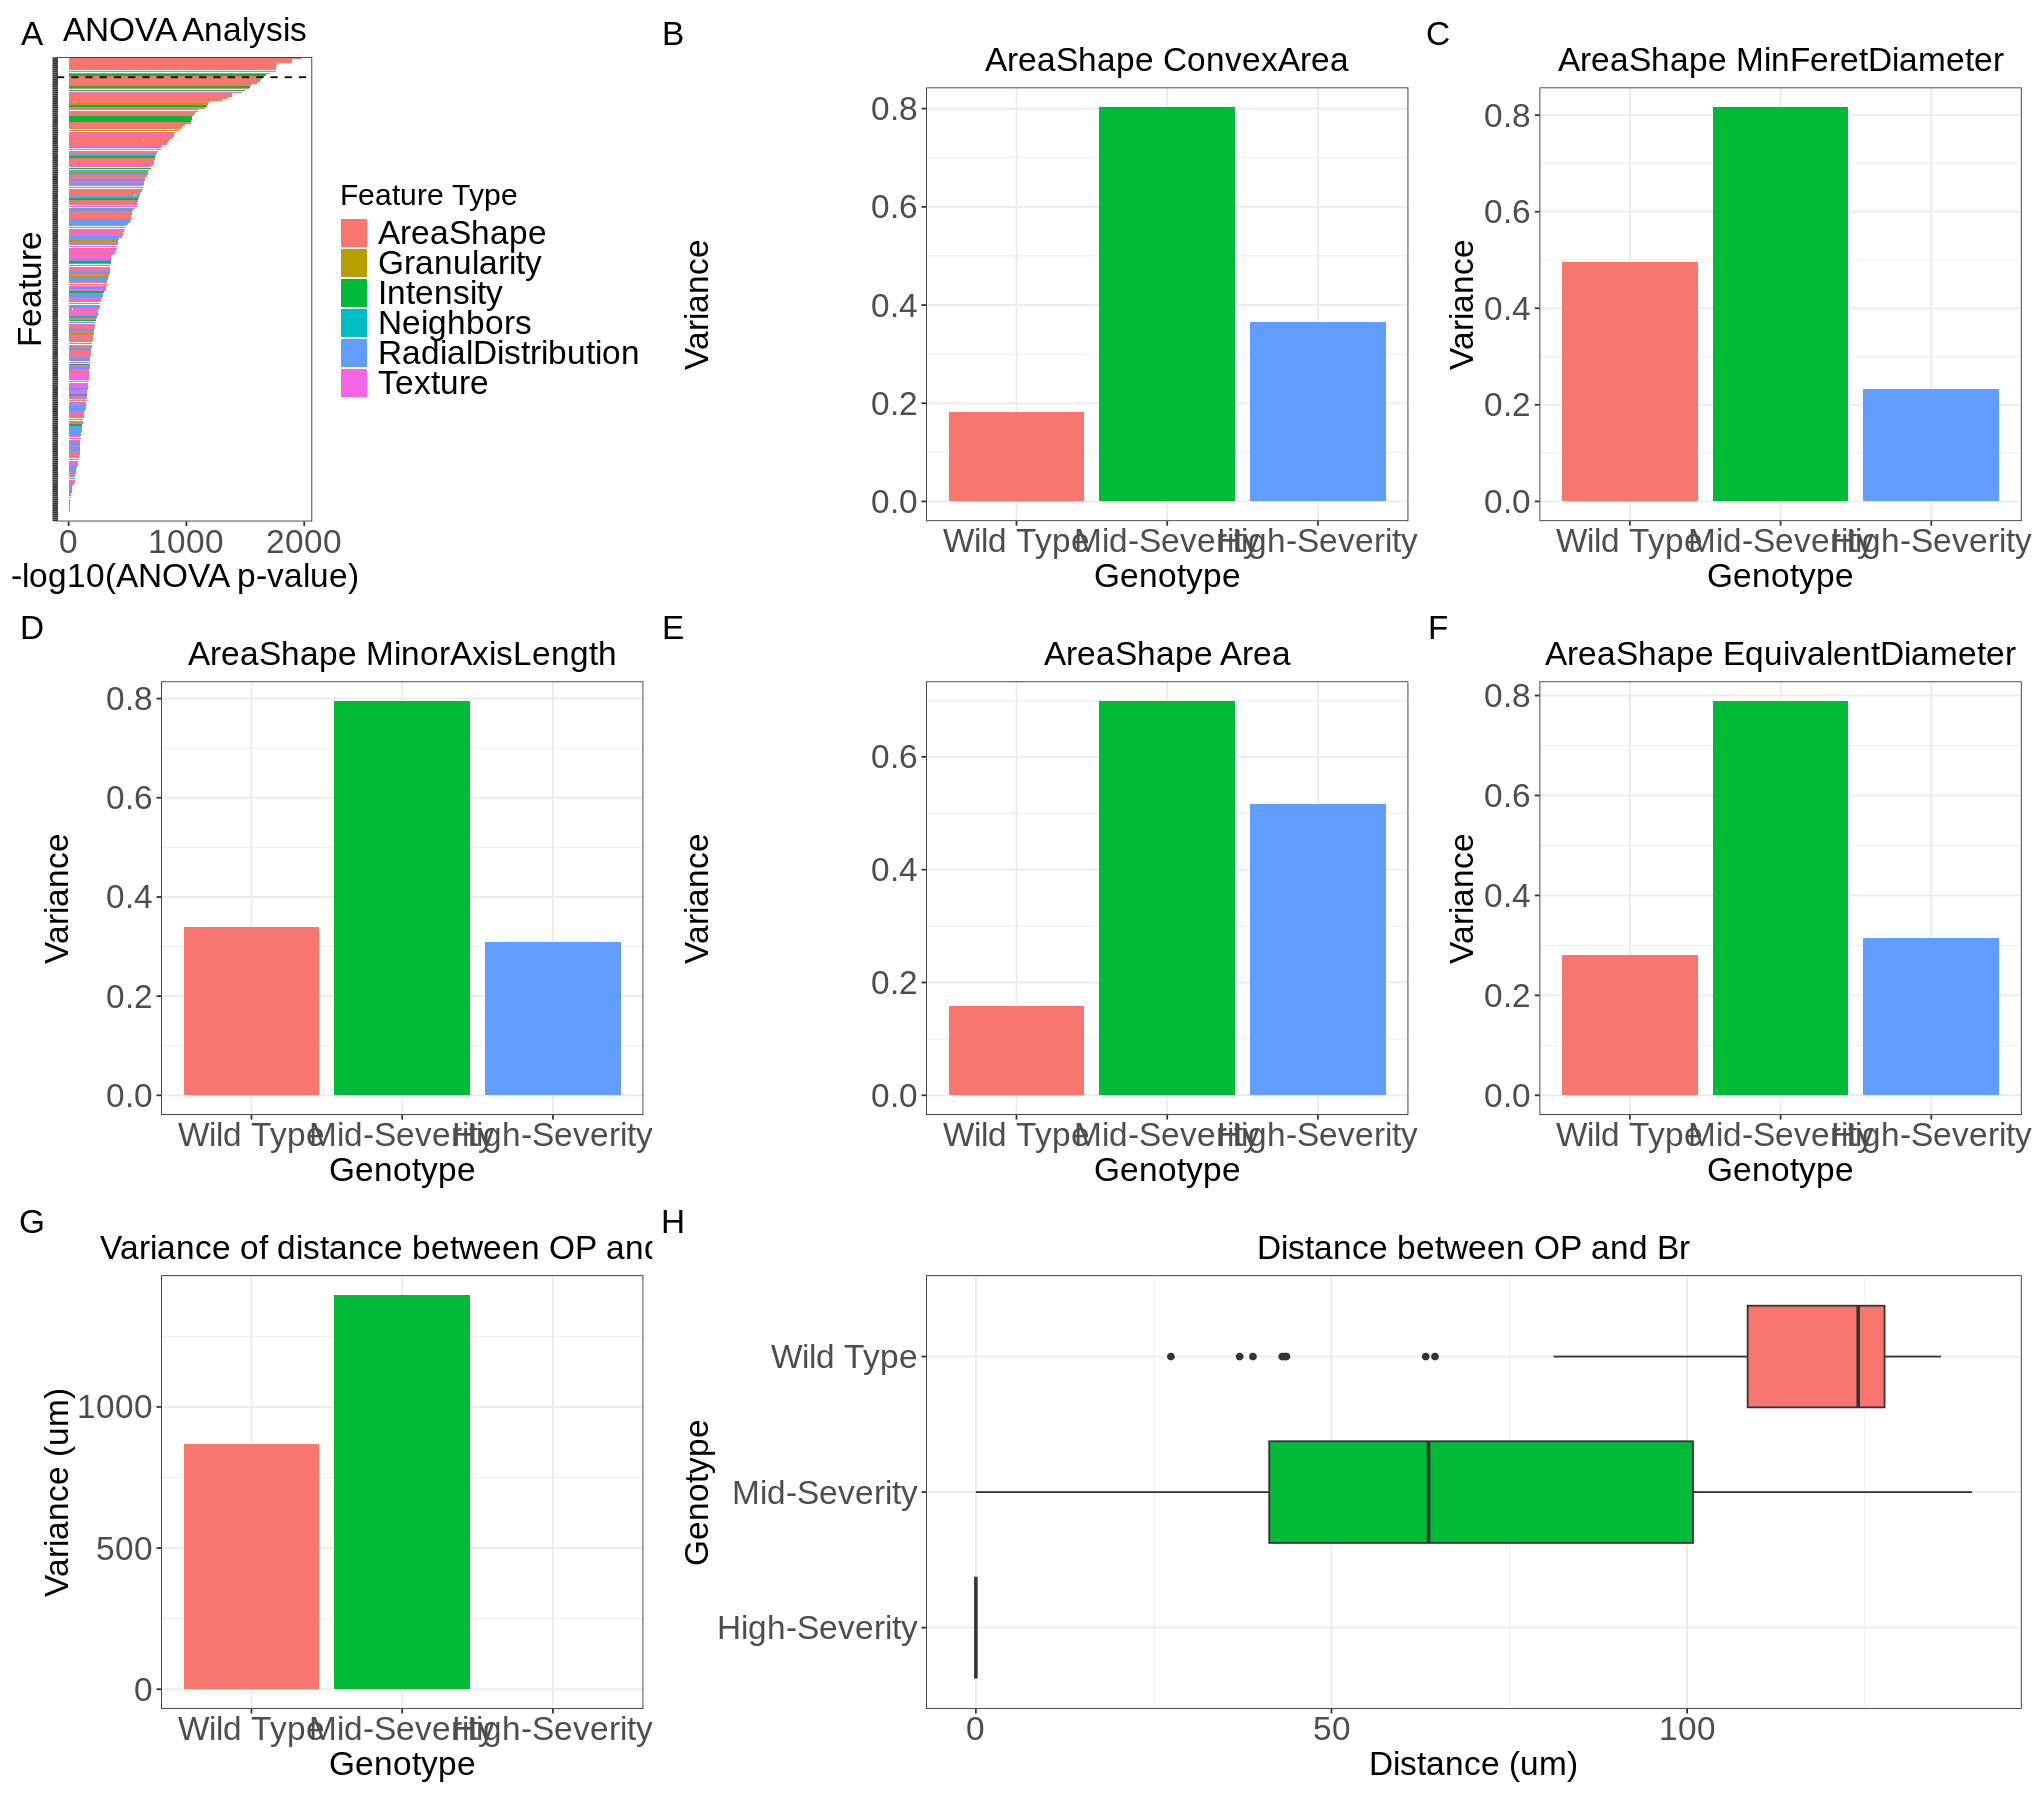

In [12]:
width <- 17
height <- 15
options(repr.plot.width = width, repr.plot.height = height)
# remove the legend from each plot
var_plot <- var_plot + theme(legend.position = "none")
distance_plot <- distance_plot + theme(legend.position = "none")
list_of_genotype_side_identity_anova_plots_split_by_genotype[[1]] <- list_of_genotype_side_identity_anova_plots_split_by_genotype[[1]] + theme(legend.position = "none")
list_of_genotype_side_identity_anova_plots_split_by_genotype[[2]] <- list_of_genotype_side_identity_anova_plots_split_by_genotype[[2]] + theme(legend.position = "none")
list_of_genotype_side_identity_anova_plots_split_by_genotype[[3]] <- list_of_genotype_side_identity_anova_plots_split_by_genotype[[3]] + theme(legend.position = "none")
list_of_genotype_side_identity_anova_plots_split_by_genotype[[5]] <- list_of_genotype_side_identity_anova_plots_split_by_genotype[[5]] + theme(legend.position = "none")
list_of_genotype_side_identity_anova_plots_split_by_genotype[[8]] <- list_of_genotype_side_identity_anova_plots_split_by_genotype[[8]] + theme(legend.position = "none")

layout <- c(
    area(t=1, b=1, l=1, r=1),
    area(t=1, b=1, l=2, r=2),
    area(t=1, b=1, l=3, r=3),
    area(t=2, b=2, l=1, r=1),
    area(t=2, b=2, l=2, r=2),
    area(t=2, b=2, l=3, r=3),
    area(t=3, b=3, l=1, r=1),
    area(t=3, b=3, l=2, r=3)
)


final_plot <- (
    wrap_elements(full = anova_plot)
    + list_of_genotype_side_identity_anova_plots_split_by_genotype[[1]]
    + list_of_genotype_side_identity_anova_plots_split_by_genotype[[2]]
    + list_of_genotype_side_identity_anova_plots_split_by_genotype[[3]]
    + list_of_genotype_side_identity_anova_plots_split_by_genotype[[5]]
    + list_of_genotype_side_identity_anova_plots_split_by_genotype[[8]]
    + var_plot
    + distance_plot
    + plot_layout(design = layout)
    + plot_annotation(tag_levels = "A") & theme(plot.tag = element_text(size = 20))

)

# make the figures path if it doesn't exist
if (!dir.exists("../figures/")){
    dir.create("../figures/", showWarnings = FALSE)
}
png("../figures/final_plot.png", width = width, height = height, units = "in", res = 600)
final_plot
dev.off()
final_plot